In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def show(img, name='test'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 1 边界填充

In [2]:
img = cv2.imread('./image/images.png')

(top_size, bottom_size, left_size, right_size) = (50, 50, 50, 50)
replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

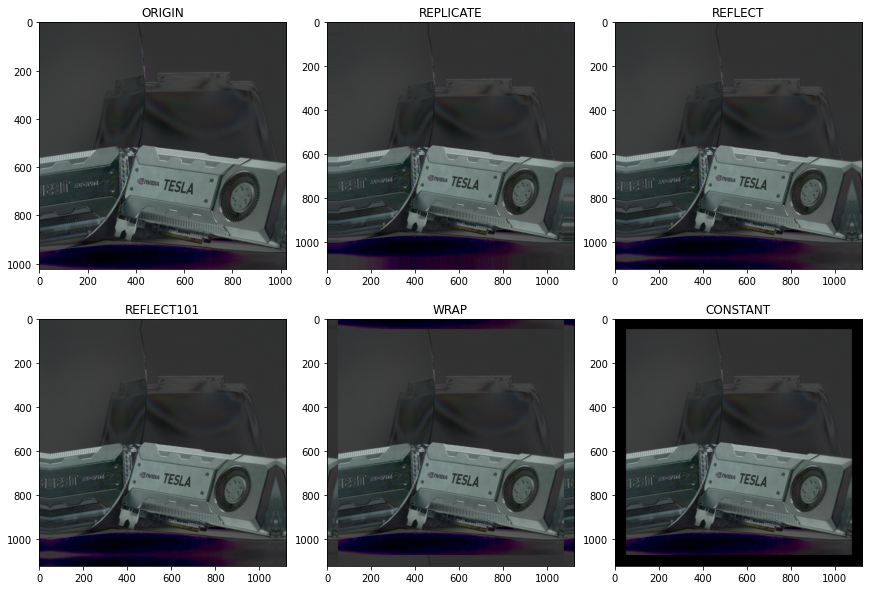

In [3]:
plt.figure(figsize=(15,10))  # 调整画布大小
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGIN')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)  # 调整布局
plt.show()

## 2 通道分离and数值计算

In [4]:
b, g, r = cv2.split(img)
img = cv2.merge([b, g, r])
show(img)

In [6]:
b[1000:1005, :]

array([[18,  9, 18, ..., 49, 47, 48],
       [18, 26, 26, ..., 48, 46, 50],
       [29, 34, 36, ..., 48, 48, 50],
       [34, 39, 39, ..., 48, 48, 49],
       [39, 39, 45, ..., 46, 47, 51]], dtype=uint8)

In [7]:
g[1000:1005, :]

array([[ 6,  0,  0, ..., 44, 48, 49],
       [ 0,  6,  0, ..., 48, 49, 50],
       [ 6,  0,  0, ..., 47, 48, 50],
       [ 6, 13,  6, ..., 49, 47, 48],
       [13, 13, 13, ..., 46, 47, 47]], dtype=uint8)

In [8]:
cv2.add(b, g, r)[1000:1005, :]

array([[ 24,   9,  18, ...,  93,  95,  97],
       [ 18,  32,  26, ...,  96,  95, 100],
       [ 35,  34,  36, ...,  95,  96, 100],
       [ 40,  52,  45, ...,  97,  95,  97],
       [ 52,  52,  58, ...,  92,  94,  98]], dtype=uint8)

## 3 图像剪裁, 图像加权和

In [9]:
r_size = cv2.resize(r, (500, 900))
b_size = cv2.resize(b, (500, 900))
show(r_size)

In [10]:
res = cv2.addWeighted(r_size, 0.4, b_size, 0.6, 0)  # res = 0.4*r_size + 0.6b_szie + 0
show(res)

## 4 图像阈值

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

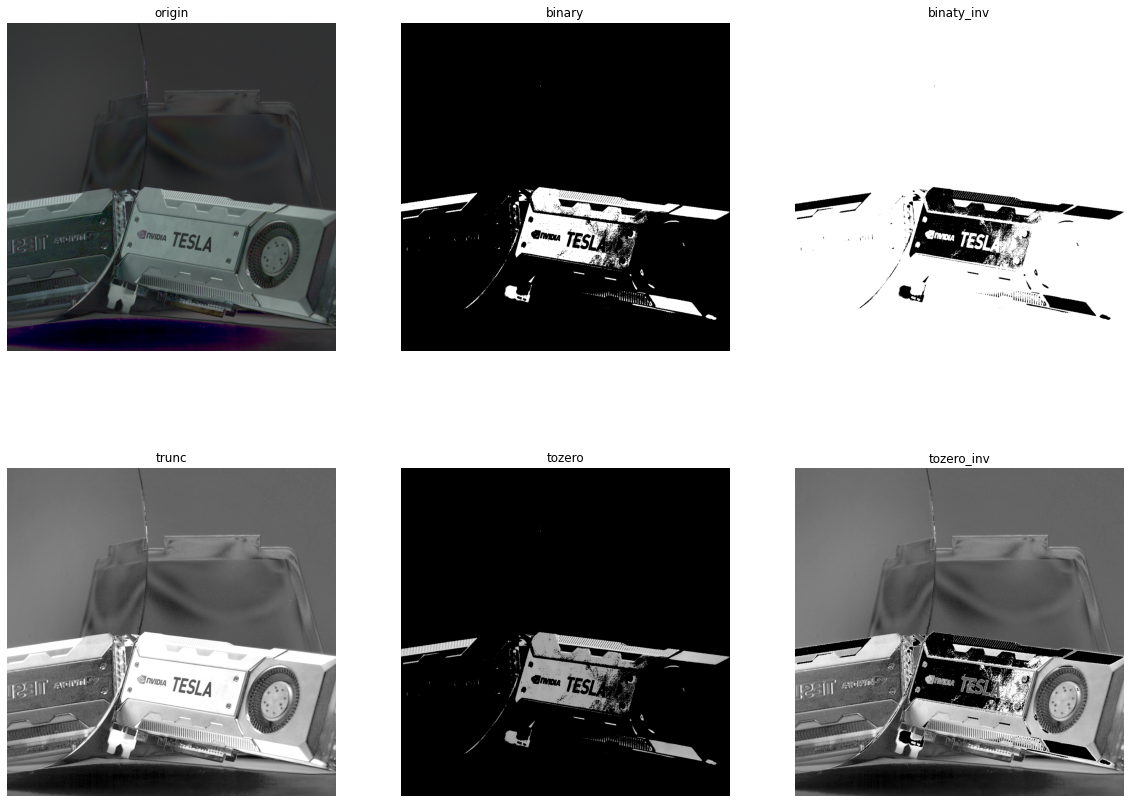

In [55]:
titles = ['origin', 'binary', 'binaty_inv', 'trunc', 'tozero', 'tozero_inv']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    # plt.xticks([]), plt.yticks([])
    plt.axis('off')  # 不显示坐标系
plt.show()

## 5 图像平滑处理（滤波操作）

In [13]:
# 均值滤波 
img1 = cv2.resize(img, (500, 500))
blur = cv2.blur(img1, (3,3))
show(blur)

In [14]:
# 方框滤波，基本和均值滤波一样，可以选择是否归一化
box = cv2.boxFilter(img1, -1, (3,3), normalize=True)
show(blur)

In [15]:
# 高斯滤波, 卷积核中的数值满足高斯分布（中间的权重更大）
gaussian = cv2.GaussianBlur(img1, (5,5), 1)
show(gaussian)

In [16]:
# 中值滤波
median = cv2.medianBlur(img1, 5)
show(median)

In [17]:
# 展示所有
res = np.hstack((blur, box, gaussian, median))
show(res)

## 6 形态学
### 6.1 腐蚀操作

In [18]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
show(erosion)

### 6.2 膨胀操作

In [19]:
kernel = np.ones((3, 3), np.uint8)
dige_dilate = cv2.dilate(img, kernel, iterations=1)
show(dige_dilate)

In [20]:
res = np.hstack((erosion, dige_dilate))
show(res)

### 6.3 开运算（先腐蚀再膨胀）与闭运算（先膨胀再腐蚀）

In [21]:
# 开运算
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
show(opening)

In [22]:
# 闭运算
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
show(closing)

### 6.4 梯度运算

In [23]:
kernel = np.ones((3, 3), np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
show(gradient)

### 6.4 礼帽与黑帽
- 礼帽 = 原始图像-开运算结果
- 黑帽 = 闭运算-原始输入

In [24]:
# 礼帽（保留细节？）
kernel = np.ones((5, 5), np.uint8)
lihat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
show(lihat)

In [25]:
# 黑帽（不知道干啥用？）
kernel = np.ones((5, 5), np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
show(blackhat)

In [26]:
combine = np.hstack((lihat, blackhat))
show(combine)

## 7 图像梯度
### 7.1 sobel算子

In [27]:
img2 = cv2.imread('./image/image1.png')
sobelx = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
show(sobelx)

In [28]:
sobely = cv2.Sobel(img2, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
show(sobely)

In [29]:
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
show(sobelxy)

### 7.2 scharr算子
比sobel算子更敏感，描绘的更细节（纹理细节）一些（好事）
### 7.3 laplacian算子
相当于二阶导，对一些噪音点更敏感（不是好事）

In [30]:
# scharr算子
scharrx = cv2.Scharr(img2, cv2.CV_64F, 1, 0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(img2, cv2.CV_64F, 0, 1)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)
show(scharrxy)

In [31]:
# laplacian算子
laplacian = cv2.Laplacian(img2, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
show(laplacian)

## 8 Canny边缘检测
- 1 使用高斯滤波器，以平滑图像滤除噪声
- 2 计算图象中每个像素点的梯度强度和方向
- 3 应用非极大值抑制，以消除边缘检测带来的杂散响应
- 4 应用双阈值检测，确定真实的和潜在的边缘
- 5 通过抑制孤立的弱边缘最终完成边缘检测

### 8.1 非极大值抑制and边缘检测效果

In [32]:
# canny的调用
v1 = cv2.Canny(img, 100, 250)  # (图像，最小值，最大值) 最小值越小，边界越多
show(v1)

## 9 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔

In [36]:
up = cv2.pyrUp(img)
show(up)
# print(up.shape)

In [37]:
down = cv2.pyrDown(img)
show(down)
print(down.shape)

(512, 512)


拉普拉斯金字塔：原始图像- 先上采样再下采样的图像

In [38]:
# 拉普拉斯金字塔
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
laplace = img - down_up
show(laplace)

# 9 轮廓检测方法

In [3]:
img = cv2.imread("./image/images.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show(thresh)

In [33]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)  # 在新版本opencv中，该函数只返回两个值

In [52]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show(res)

轮廓特征

In [60]:
cnt = contours[0]  # 拿到其中的一个轮廓
cv2.contourArea(cnt)  # 计算轮廓面积
cv2.arcLength(cnt, True)  # 计算轮廓周长

82.18376553058624

轮廓近似

In [61]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
show(res)

In [63]:
epsilon = 0.01*cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show(res)

边界矩形

In [68]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
show(img)

In [73]:
area = cv2.contourArea(cnt)  # 计算轮廓面积
area2 = w*h  # 矩形框的面积
percentage = float(area) / area2  # 面积占比

0.9216216216216216